<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/Regresion%20Lineal%20Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESION LINEAL MULTIPLE

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az # de esta manera lo que hacemos es acceder a todos los datasets mios de github. en este caso de marchine learning de la a a la z

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10541 (delta 25), reused 0 (delta 0), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 24.03 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


# Test it

In [3]:
!ls '/content/machinelearning-az' 

'additional materials'	 LICENSE		    README.md
 datasets		 machinelearning-az.Rproj


# Google colab tools

In [4]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive
import sklearn
from sklearn.impute import SimpleImputer

# Plantilla de Pre Procesado

##  Cómo importar las librerías


In [6]:
import numpy as np # este para matemáticas. 
import matplotlib.pyplot as plt # este para gráficos
import pandas as pd # perfecta carga, manipular.... datos. 

## Importar el data set


In [7]:
# VAMOS A HACER UNA REGRESSION LINEAL SIMPLE. 

dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')


# tenemos 5 columnas enteindo que las variables independientes serán todas excepto la de profit que es la última. 

In [105]:
dataset.head(5) # I+D, GASTOS EN ADMON, GASTOS EN MARKETING, ESTADO, BENEFICIO. VEMOS QUE HAY QUE CONVERTIR UNA A VARIABLE DUMMY. 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## FILTRAR DATASET

In [10]:
dataset.iloc[:, 0:3].head() # esto no vale para nada es para ver como filtrar un data set. 
# NO HEMOS ASIGNADO VARIABLE POR LO TANTO NO CAMBIA NADA SOLO SE VISUALIZA

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


## DIVIDIR EL DATA SET EN DOS. VARIABLES INDEPENDIENTES Y DEPENDIENTES

In [11]:
X = dataset.iloc[:, :-1].values # años de experiencia son las variables independientes 
y = dataset.iloc[:, 4].values # Salary es la variable dependiente 

## DATOS FALTANTES

con los datos faltantes podemos hacer muchas cosas. eliminar la columna, la fila, rellenar con un valor, rellenar con la media, con el valor anterior, posterior etc...

In [ ]:
""" NO LO EJECUTAMOS PORQUE NO TENEMOS VALORES FALTANTES"""
from pandas.core import missing
# VAMOS A REMPLAZAR POR LA MEDIA. 
# recordatorio axis = 0 es media de columna si fuera 1 sería por linea. 
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean", verbose=0) # asi lo que hacemos es convertir los valores nan por la media de la columna. 
imputer = imputer.fit(X[:,1:3]) # el objeto que queremos arreglar es la X, le decimos que todas las filas, y acotamos las columnas a las que se lo queremos hacer. recordar ponemos 3 porque coge siempre la anterior. 
# en python la primera columna es 0 y cuando acotamos la última que cogemos siempre ponemos un numero más. 
X[:, 1:3] = imputer.transform(X[:,1:3]) # asi es como definitivamente lo hacemos. 
 
"""
Escribimos código
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean", verbose=0)
imputer = imputer.fit(X[:,1:3])
x[:,1:3] = imputer.transform[X[:,1:3]] """
X # veremos debajo que ha quedado sustituido.

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## DATOS CATEGORICOS TRADUCIR A NUMEROS. 

esta vez lo vamos a hacer así, lo hace de una vez y no nos repite la serie. 

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = make_column_transformer((OneHotEncoder(), [3]), remainder = "passthrough")
X = onehotencoder.fit_transform(X)

In [14]:
 X #√emos que la columna 3 es New York, la columna 1 es california, Florida es la dos. 
 # MAS ADELANTE QUITAREMOS UNA DE LAS TRES

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## CONVERTIR UNA CATEGORICA PERO TODO EN UNA COLUMNA. 

In [ ]:
"""# LO HAGOCON EL METODO DE DEBAJO EL HOTENCODER
labelencoder_X = LabelEncoder() # este es el constructor 
X[:, 0] = labelencoder_X.fit_transform(X[:, 0]) # sabemos que 0 es la columna de país. 
X[:,0] # como podemos ver la primera que era Francia la ha codificado como 0, la seguna españa 2, la tercera alemania 1...."""

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

In [ ]:
"""#X # aqui vemos como lo ha cambiado. el problema que al codificarlo así, va a entender que 0 es menor que 1. es decir la va a considerar como ordinal.....
# ahora debajo vamos a ver las variables dummy.""" 

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [59]:
"""
ESTO NO VALE. LO TENGO IMPLEMENTADO DEBAJO MEJOR. 
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
"""

In [ ]:
"""
ESTO NO VALE LO TENGO DEBAJO MEJOR IMPLEMENTADO. 
X = ct.fit_transform(X)
X # vemos que aquí ya lo ha transformado, p"""

## Evitar la trampa de las variables ficticias

In [15]:
X = X[:, 1:] # con esto lo que hacemos es eliminar una ya que cuando dos den 0 será la tercera. 

In [16]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [19]:
#IMPORTANTE PRIMERO CREAR X E Y. ESTA ARRIBA
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # random_state es la semilla. 

In [21]:
result = pd.DataFrame({'California': X[:, 0], 'Florida': X[:, 1],'New York': X[:, 2]})
#result = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1],'Column3': X[:, 2]})
# esto entiendo es para convertir el array en un dataframe. 

In [22]:
result.head()

,California,Florida,New York
0,0.0,1.0,165349.2
1,0.0,0.0,162597.7
2,1.0,0.0,153441.51
3,0.0,1.0,144372.41
4,1.0,0.0,142107.34


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


# Escalado de variables

## ESCALADO STANDAR

No hace falta porque solo tenemos una variable.

In [ ]:
from sklearn.preprocessing import StandardScaler # esta tenderá a crear una campana de gauss. aglutina valores en torno a la media. 
# la normalización, transforma en 0 y 1

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) # aqui le decimos que escale igual que en X_train. 
# la pregunta sería ¿tenemos que escalar las variables dummy?.  AQUI SI LO HACEMOS. 

In [ ]:
X_train # como vemos al haberlo transformados el 0 1 de los paises se ha convertido en numeros diferentes. 

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [ ]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])

In [ ]:
dataset # aui tenemos el dataset original. no se ha modificado nada. 

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# REGRESION LINEAL MULTIPLE

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# se hace igual que la simple
regression = LinearRegression()
regression.fit(X_train, y_train)
# hay que observar que tengan el mismo tamaño. lo hemos visto arriba con shape. 

LinearRegression()

## PREDECIR EL CONJUNTO DE TEST

In [26]:
y_pred = regression.predict(X_test) # utilizamos el predict de Xtest

In [27]:
y_pred # estos representan una recta. 

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [28]:
y_test # estos no son una recta son los reales. 

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

como vemos arriba con la primera persona hemos predecido 103015 y el real es 103282, el segundo 132582 y el real es 144259 y así sucesivamente. 

# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás. Con esto vamos quitando las variables que no son significativas. 

In [29]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1) # le vamos añadir un array de unos al inicio. (50,1) 50 unos en la fila 1
# le decimos que sean enteros. axis igual a 1 porque queremos que vaya en columna, 
SL = 0.05

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
X

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

#Se ha añadido el modificador .tolist() al X_opt para adaptarse a Python 3.7

In [31]:
# vamos a ir una a una. primero comprobamos todas, que son las tres lineas de debajo.
# con esta primera comprobación en el summary del resultado nos dice la optima
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary() # al ejecutar esto me queda que debo utilizar 0 y 3
"""
X_opt = X[:, [0, 1, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [0, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [0, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [0, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()"""

'\nX_opt = X[:, [0, 1, 3, 4, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3, 4, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()'

- EN ESTE TEXTO AL FINAL VEMOS COMO NOS DICE CUAL ES LA OPTIMA CON EL REGRESSION_OLS.SUMARY(
- '\nX_opt = X[:, [0, 1, 3, 4, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3, 4, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3, 5]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()\n\nX_opt = X[:, [0, 3]]\nregression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()\nregression_OLS.summary()'

In [32]:
X_opt = X[:, [0, 3]] # la 3 que es la 2 es el gasto en marketing. 
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()
# arriba lo que ha hecho ha sido eliminar paso a paso las que su p valor no es significativo. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.50e-32
Time:                        04:45:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# REGRESION LINEAL SIMPLE.VAMOS A HACER EL GRAFICO SEGÚN LOS RESULTADOS. AL FINAL COMO SOLO NOS QUEDAMOS CON UNA VARIABLE INDEPENDIENTE ES COMO SI FUERA UNA REGRESIÓN LINEAL SIMPLE

In [35]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
# AQUI FILTRAMOS Y NOS QUEDAMOS OLO CON MARKETING
dataset2 =dataset.iloc[:, 2:3]
dataset2.head(5)

,Marketing Spend
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [37]:
# aqui filtramos y nos quedamos con la variable independiente que es la ultima. 
dataset3 = dataset.iloc[:, -1]

In [38]:
# aqui lo convertimos en dataframe. 
dataset3 = pd.DataFrame(dataset3) # aqui lo estamos convirtiendo a dataframe. 
dataset3.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [39]:
# así lo que hacemos es unir los dos dataframes. 
dataset4 = pd.concat([dataset2, dataset3], axis=1, join='inner')
dataset4.head()

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94


In [60]:
dataset4.dtypes

Marketing Spend    float64
Profit             float64
dtype: object

AHORA VAMOS A SEPARAR LA VARIABLE DEPEDIENTE DE LA INDEPENDIENTE

In [65]:

X = dataset4.iloc[:, :-1].values # gasto en marketing, importante hacerlo así [:, :-1] no vale hacerlo [:,0]
y = dataset4.iloc[:, 1].values # beneficio 

In [66]:
#result = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1],'Column3': X[:, 2]})

In [67]:
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [68]:
X

array([[471784.1 ],
       [443898.53],
       [407934.54],
       [383199.62],
       [366168.42],
       [362861.36],
       [127716.82],
       [323876.68],
       [311613.29],
       [304981.62],
       [229160.95],
       [249744.55],
       [249839.44],
       [252664.93],
       [256512.92],
       [261776.23],
       [264346.06],
       [282574.31],
       [294919.57],
       [     0.  ],
       [298664.47],
       [299737.29],
       [303319.26],
       [304768.73],
       [140574.81],
       [137962.62],
       [134050.07],
       [353183.81],
       [118148.2 ],
       [107138.38],
       [ 91131.24],
       [ 88218.23],
       [ 46085.25],
       [214634.81],
       [210797.67],
       [205517.64],
       [201126.82],
       [197029.42],
       [185265.1 ],
       [174999.3 ],
       [172795.67],
       [164470.71],
       [148001.11],
       [ 35534.17],
       [ 28334.72],
       [  1903.93],
       [297114.46],
       [     0.  ],
       [     0.  ],
       [ 45173.06]])

In [69]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # random_state es la semilla. 

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regression = LinearRegression()
regression.fit(X_train, y_train)
# hay que observar que tengan el mismo tamaño. lo hemos visto arriba con shape. 

LinearRegression()

# predecir el conjunto de test

In [74]:
y_pred = regression.predict(X_test) # utilizamos el predict de Xtest

# VISUALIZAR LOS DATOS DE ENTRENAMIENTO

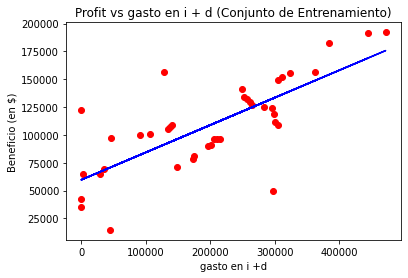

In [75]:
plt.scatter(X_train, y_train, color = "red") # scatter es nube de puntos. 
plt.plot(X_train, regression.predict(X_train), color = "blue") # X_train son los valores de entrenamiento, regression.predict(X_train) es la predicciión en base a los fit de X_train (esto es la y)
plt.title("Profit vs gasto en i + d (Conjunto de Entrenamiento)")
plt.xlabel("gasto en i +d")
plt.ylabel("Beneficio (en $)")
plt.show()

# visualizar datos de testing

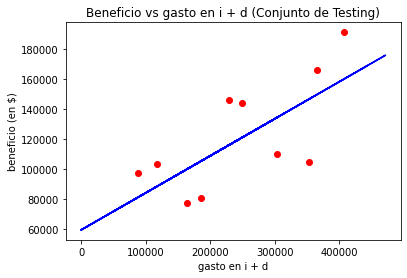

In [76]:
plt.scatter(X_test, y_test, color = "red") # scatter es nube de puntos. 
plt.plot(X_train, regression.predict(X_train), color = "blue") # la recta tiene que ser la misma. 
plt.title("Beneficio vs gasto en i + d (Conjunto de Testing)")
plt.xlabel("gasto en i + d")
plt.ylabel("beneficio (en $)")
plt.show()